In [2]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
)

In [69]:
df = pd.read_csv("backpain.csv")
data = df.copy()
data['Status'] = data['Status'].apply(lambda x: 1 if x=='Abnormal' else 0)
# Splitting the Independent and dependent variabl
X = data.drop(['Status'], axis=1)
Y = data['Status']
# to split the data into train and test
from sklearn.model_selection import train_test_split
#Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state = 1)
#Getting the percentages
y_train.value_counts(normalize=True)

1    0.663594
0    0.336406
Name: Status, dtype: float64

In [70]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)
# Grid of parameters to choose from
parameters = {'max_depth': [5,10,15,None], 
 'criterion' : ['gini','entropy'],
 'splitter' : ['best','random']
}
# To tune different models
from sklearn.model_selection import GridSearchCV
# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring='recall',cv=3)
grid_obj = grid_obj.fit(X_train, y_train)
# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_
# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=1,
                       splitter='random')

In [72]:
# Training decision tree with default parameters
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train,y_train)
# Tuned model
estimator.fit(X_train, y_train)
# Predicting on the test set
y_pred_test1 = model.predict(X_test)
y_pred_test2 = estimator.predict(X_test)
# Predicting on the test set
y_pred_test1 = model.predict(X_test)
y_pred_test2 = estimator.predict(X_test)

from sklearn import metrics
from sklearn.metrics import f1_score
# Checking model performance of Decision Tree with default parameters
print(recall_score(y_test,y_pred_test1))
print(metrics.f1_score(y_test,y_pred_test1))

# Checking model performance of tunedDecision Tree
print(recall_score(y_test,y_pred_test2))
print(metrics.f1_score(y_test,y_pred_test2))

0.7878787878787878
0.832
0.803030303030303
0.8153846153846153


In [5]:
df.corr()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743,0.043290,-0.078411,-0.089740,0.016750,0.019240,-0.007251
pelvic tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862,0.008852,-0.072119,-0.063394,0.028931,0.032859,-0.056550
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667,0.029486,-0.112939,-0.063582,0.063875,0.057199,-0.049054
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557,0.048988,-0.046914,-0.067968,-0.000063,0.000207,0.032853
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065,0.015767,0.063433,0.060477,-0.039800,0.029738,-0.030145
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000,0.085925,-0.063812,-0.057286,0.056576,0.023021,-0.041023
pelvic_slope,0.043290,0.008852,0.029486,0.048988,0.015767,0.085925,1.000000,0.012694,-0.011770,0.088017,0.060743,-0.073893
Direct_tilt,-0.078411,-0.072119,-0.112939,-0.046914,0.063433,-0.063812,0.012694,1.000000,0.009887,0.072738,-0.037428,-0.024021
thoracic_slope,-0.089740,-0.063394,-0.063582,-0.067968,0.060477,-0.057286,-0.011770,0.009887,1.000000,0.052451,0.011354,0.009541
cervical_tilt,0.016750,0.028931,0.063875,-0.000063,-0.039800,0.056576,0.088017,0.072738,0.052451,1.000000,0.057451,0.021243


In [7]:
df['Status']

0      Abnormal
1      Abnormal
2      Abnormal
3      Abnormal
4      Abnormal
         ...   
305      Normal
306      Normal
307      Normal
308      Normal
309      Normal
Name: Status, Length: 310, dtype: object

In [8]:
df['Status'] = df['Status'].replace({'Abnormal': 1, 'Normal': 0})

In [9]:
df['Status']

0      1
1      1
2      1
3      1
4      1
      ..
305    0
306    0
307    0
308    0
309    0
Name: Status, Length: 310, dtype: int64

In [11]:
Y = df['Status']
X = df.drop('Status', axis=1)
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [64]:
y_train.shape

(217,)

In [65]:
y_train.sum()/217

0.663594470046083

In [17]:
1-y_train.sum()/217

0.33640552995391704

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [21]:
for i in range(1,9):
    print(i)

1
2
3
4
5
6
7
8


In [25]:
def calc_recall(conf_matrix):
    TP = conf_matrix[1, 1]  # True Positives
    FN = conf_matrix[1, 0]  # False Negatives
    TN = conf_matrix[0, 0]  # True Negatives

    # Calculate recall (sensitivity)
    recall = TP / (TP + FN)
    return recall

In [30]:
feature_names = list(X.columns)
print(feature_names)

['pelvic_incidence', 'pelvic tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'pelvic_slope', 'Direct_tilt', 'thoracic_slope', 'cervical_tilt', 'sacrum_angle', 'scoliosis_slope']


In [36]:
for d in range(1,9):
 
    clf = DecisionTreeClassifier(max_depth=d)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_train) 
    conf_matrix = confusion_matrix(y_train, predictions)
    recall = calc_recall(conf_matrix)
    print(f"depth: {d} recall: {recall}")
    importances = clf.feature_importances_
    indices = np.argsort(importances)
    

depth: 1 recall: 0.6875
depth: 2 recall: 0.8888888888888888
depth: 3 recall: 0.8888888888888888
depth: 4 recall: 0.9583333333333334
depth: 5 recall: 0.9652777777777778
depth: 6 recall: 0.9930555555555556
depth: 7 recall: 0.9861111111111112
depth: 8 recall: 1.0


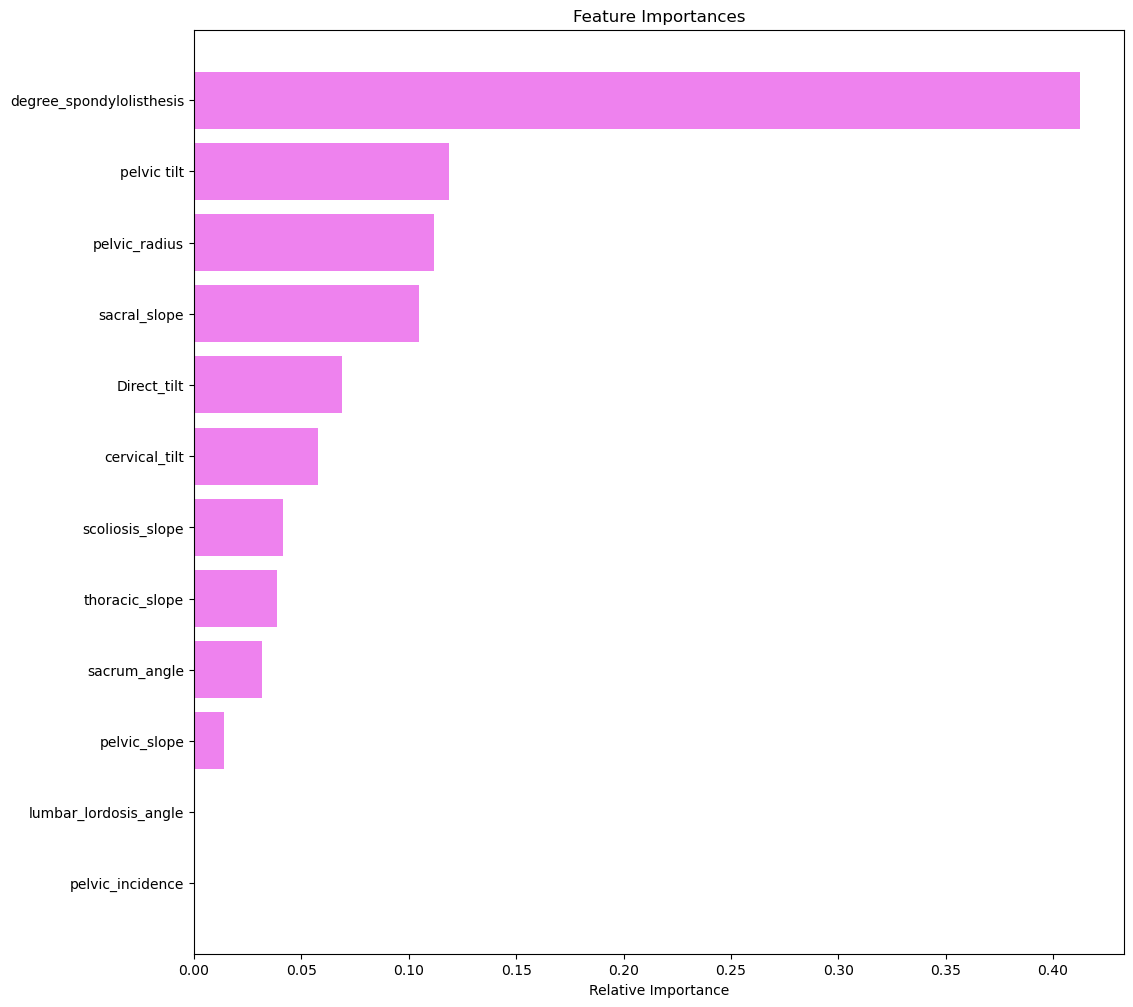

In [37]:
clf = DecisionTreeClassifier(max_depth=8)
clf.fit(X_train, y_train)
predictions = clf.predict(X_train) 
conf_matrix = confusion_matrix(y_train, predictions)
recall = calc_recall(conf_matrix)
importances = clf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [43]:
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_depth': [5,10,15,None], 
              'criterion': ['gini','entropy'],
              'splitter': ['best','random']
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=3)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)
predictions = estimator.predict(X_train) 
    
conf_matrix = confusion_matrix(y_train, predictions)

calc_recall(conf_matrix)


0.9791666666666666

In [44]:
get_recall_score(estimator)

Recall on training set :  0.9791666666666666
Recall on test set :  0.803030303030303


In [60]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test) 
    
conf_matrix = confusion_matrix(y_test, predictions)

recall_default = calc_recall(conf_matrix)
r_default = metrics.recall_score(y_test,predictions)
f1_default = f1_score(y_test, predictions)
print(r_default,f1_default)

0.8333333333333334 0.859375


In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import f1_score
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_depth': [5,10,15,None], 
              'criterion': ['gini','entropy'],
              'splitter': ['best','random']
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=3)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)
predictions = estimator.predict(X_test) 
#f1 = f1_score(y_test, predictions)
#print(f1)
#get_recall_score(estimator)

r_tuned = metrics.recall_score(y_test,predictions)
f1_tuned = f1_score(y_test, predictions)
print(r_default,r_tuned,f1_default,f1_tuned)

0.8333333333333334 0.803030303030303 0.859375 0.8153846153846153
